# PERGUNTAS : 
  
    Existe mais probabilidade de ter algum problema de coração de acordo com o sexo da pessoa?

    Qual a relação do número de problemas cardiácos com o passar das décadas?
    
    Uma pessoa com glicemia maior que 120mg/dl (pessoas pré-diabéticas e diabéticas) tem mais chance de ter problema no coração?

    De acorco com o pico de exercício, a pessoa tem menos chance de desenvolver problemas cardiovasculares? Se desenvolver, está mais propenso a ser defeito fixo ou reversível?

    De acordo com o colesterol, qual a qualidade do hábito alimentar da pessoa? 

_____________________________________________________________________________________________________________________________________

# importe das bibliotecas

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## leitura do DataFreme

In [91]:
bd = pd.read_csv('heart (1).csv')

In [92]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [93]:
bd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Existe mais probabilidade de ter algum problema de coração de acordo com a idade/sexo da pessoa?

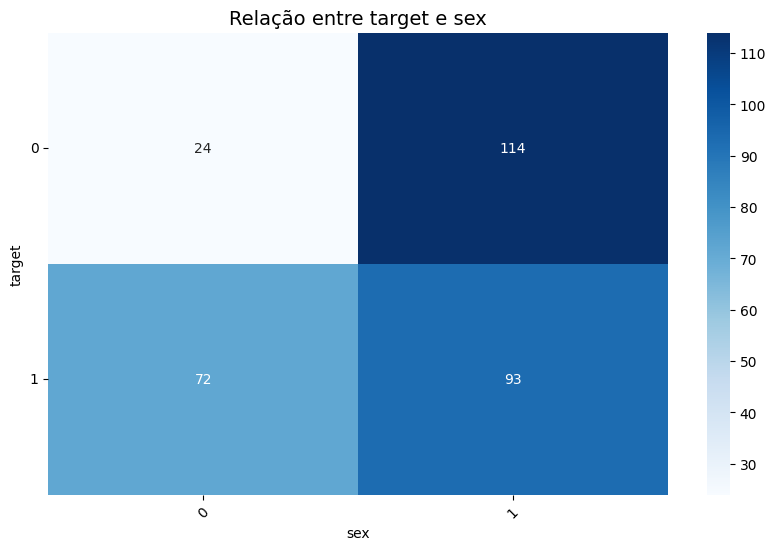

In [96]:
cross_tab = pd.crosstab(bd['target'], bd['sex'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre target e sex', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

        mulhes com problemas = 69,12%

        homem com problemas = 44,93%

### Não conseguimos achar o porquê

In [119]:
bd.loc[(bd['ca'] > 0) & (bd['target'] == 0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [135]:
bd.loc[(bd['chol'] < 200) & (bd['sex'] == 0) & (bd['ca'] == 0)].shape[0]

11

In [138]:
bd.loc[(bd['chol'] < 200) & (bd['sex'] == 0) & (bd['ca'] > 0)].shape[0]

3

In [112]:
PS = bd.loc[(bd['target'] == 0)]

In [109]:
PD = bd.loc[(bd['target'] == 1)]

In [113]:
PS.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [111]:
PD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


### Aumento do consumo de alimentos processados: A partir da década de 1970

## Qual a relação do número de problemas cardiácos com o passar das décadas?

#### Pessoas nascidas entre 1970 até 1990 tem mais problemas cardiovasculares

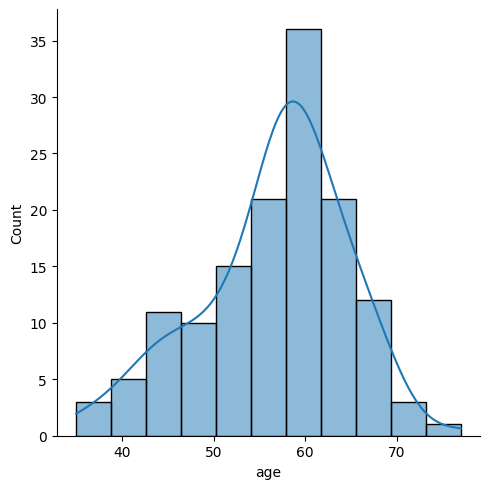

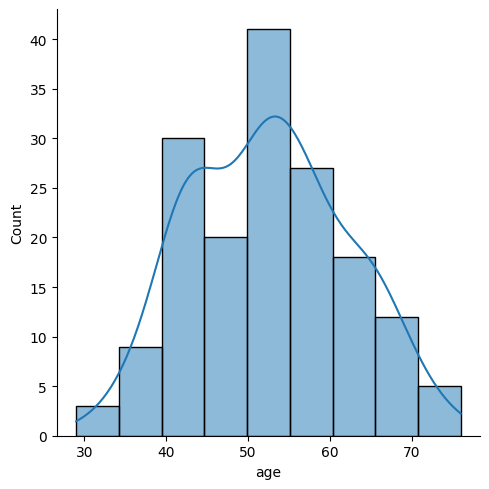

In [114]:
sns.displot(PS['age'], kde = True)
sns.displot(PD['age'], kde = True)

In [97]:
MD = bd.loc[(bd['sex'] == 0) & (bd['target'] == 1)]

In [115]:
MD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,72.000000,72.0,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0
mean,54.555556,0.0,1.333333,128.736111,256.750000,0.083333,0.583333,154.027778,0.111111,0.554167,1.583333,0.305556,2.000000,1.0
std,10.265337,0.0,0.919277,16.536765,66.216195,0.278325,0.524069,19.252929,0.316475,0.647843,0.550288,0.596678,0.290701,0.0
min,34.000000,0.0,0.000000,94.000000,141.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,46.000000,0.0,0.750000,119.500000,210.750000,0.000000,0.000000,146.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,54.000000,0.0,2.000000,130.000000,249.000000,0.000000,1.000000,159.000000,0.000000,0.250000,2.000000,0.000000,2.000000,1.0
75%,63.250000,0.0,2.000000,140.000000,289.500000,0.000000,1.000000,167.250000,0.000000,1.025000,2.000000,0.000000,2.000000,1.0
max,76.000000,0.0,3.000000,180.000000,564.000000,1.000000,2.000000,192.000000,1.000000,2.600000,2.000000,2.000000,3.000000,1.0


In [99]:
MS = bd.loc[(bd['sex'] == 0) & (bd['target'] == 0)]

In [116]:
MS.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,24.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0
mean,59.041667,0.0,0.166667,146.125000,274.958333,0.250000,0.541667,142.416667,0.583333,1.841667,0.958333,1.291667,2.500000,0.0
std,4.964913,0.0,0.481543,21.436078,60.863696,0.442326,0.658005,20.256865,0.503610,1.608379,0.464306,1.160179,0.589768,0.0
min,43.000000,0.0,0.000000,108.000000,164.000000,0.000000,0.000000,97.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,56.750000,0.0,0.000000,130.000000,234.000000,0.000000,0.000000,132.250000,0.000000,0.800000,1.000000,0.000000,2.000000,0.0
50%,60.500000,0.0,0.000000,140.000000,265.500000,0.000000,0.000000,145.500000,1.000000,1.600000,1.000000,1.500000,3.000000,0.0
75%,62.000000,0.0,0.000000,152.500000,310.000000,0.250000,1.000000,154.750000,1.000000,2.850000,1.000000,2.000000,3.000000,0.0
max,66.000000,0.0,2.000000,200.000000,409.000000,1.000000,2.000000,174.000000,1.000000,6.200000,2.000000,3.000000,3.000000,0.0


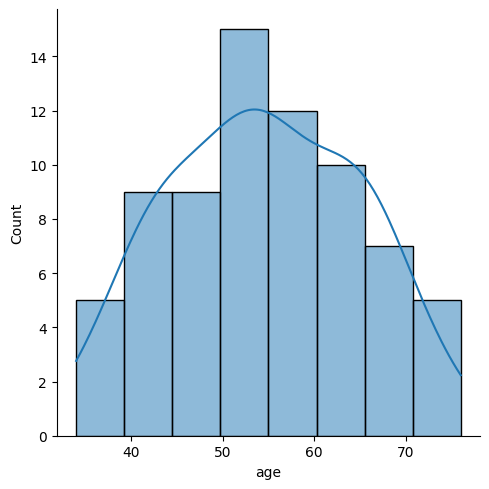

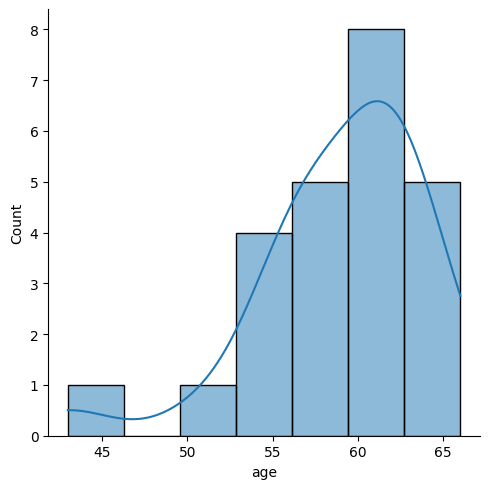

In [102]:
sns.displot(MD['age'], kde = True)
sns.displot(MS['age'], kde = True)

In [103]:
MD['age'].median()

54.0

In [104]:
MS['age'].median()

60.5